## Prediction logistic regression


In [28]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [29]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.film_id, f.title, f.release_year, f.language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost,
       AVG(p.amount) AS avg_rental_rate, COUNT(r.rental_id) AS num_rentals, 
       AVG(DATEDIFF(r.return_date, r.rental_date)) AS avg_rental_duration,
       COUNT(CASE WHEN r.return_date <= DATE_ADD(r.rental_date, INTERVAL f.rental_duration DAY) THEN 1 END) AS num_on_time_returns,
       COUNT(CASE WHEN r.return_date > DATE_ADD(r.rental_date, INTERVAL f.rental_duration DAY) THEN 1 END) AS num_late_returns
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
LEFT JOIN payment AS p ON r.rental_id = p.rental_id
GROUP BY f.film_id, f.title, f.release_year, f.language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost ;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,avg_rental_rate,num_rentals,avg_rental_duration,num_on_time_returns,num_late_returns
0,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,1.598696,27,5.0909,15,7
1,2,ACE GOLDFINGER,2006,1,3,4.99,48,12.99,7.561429,7,5.6667,1,5
2,3,ADAPTATION HOLES,2006,1,7,2.99,50,18.99,3.156667,12,3.4167,11,1
3,4,AFFAIR PREJUDICE,2006,1,5,2.99,117,26.99,3.990000,23,4.7273,11,11
4,5,AFRICAN EGG,2006,1,6,2.99,130,22.99,4.323333,12,7.0909,1,10


In [30]:
query = '''SELECT f.title, MAX(CASE WHEN YEAR(r.rental_date) = 2005 AND MONTH(r.rental_date) = 5 THEN 1 ELSE 0 END) AS rented_in_may
FROM film AS f
LEFT JOIN inventory AS i ON f.film_id = i.film_id
LEFT JOIN rental AS r ON i.inventory_id = r.inventory_id
GROUP BY f.title;'''

target = pd.read_sql_query(query, engine)
target.head()

,title,rented_in_may
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1


In [31]:
target.shape

(1000, 2)

In [68]:
data_merge=pd.merge(left=data , right=target,how='left', left_on='title',right_on='title')
data_merge

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,avg_rental_rate,num_rentals,avg_rental_duration,num_on_time_returns,num_late_returns,rented_in_may
0,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,1.598696,27,5.0909,15,7,1
1,2,ACE GOLDFINGER,2006,1,3,4.99,48,12.99,7.561429,7,5.6667,1,5,0
2,3,ADAPTATION HOLES,2006,1,7,2.99,50,18.99,3.156667,12,3.4167,11,1,1
3,4,AFFAIR PREJUDICE,2006,1,5,2.99,117,26.99,3.990000,23,4.7273,11,11,1
4,5,AFRICAN EGG,2006,1,6,2.99,130,22.99,4.323333,12,7.0909,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,2006,1,6,0.99,183,9.99,0.990000,7,4.5714,6,1,0
996,997,YOUTH KICK,2006,1,4,0.99,179,14.99,2.823333,6,5.6667,2,4,0
997,998,ZHIVAGO CORE,2006,1,6,0.99,105,10.99,1.656667,9,5.8750,5,3,1
998,999,ZOOLANDER FICTION,2006,1,5,2.99,101,28.99,4.342941,17,5.5882,7,10,1


In [69]:
cols_to_drop = ['title','film_id','title','release_year','language_id','replacement_cost','avg_rental_duration','avg_rental_rate']

# drop the specified columns from the dataframe
data_merge= data_merge.drop(cols_to_drop, axis=1)

data_merge.head()

,rental_duration,rental_rate,length,num_rentals,num_on_time_returns,num_late_returns,rented_in_may
0,6,0.99,86,27,15,7,1
1,3,4.99,48,7,1,5,0
2,7,2.99,50,12,11,1,1
3,5,2.99,117,23,11,11,1
4,6,2.99,130,12,1,10,1


In [82]:
data_merge.columns

Index(['rental_duration', 'rental_rate', 'length', 'num_rentals',
       'num_on_time_returns', 'num_late_returns', 'rented_in_may'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

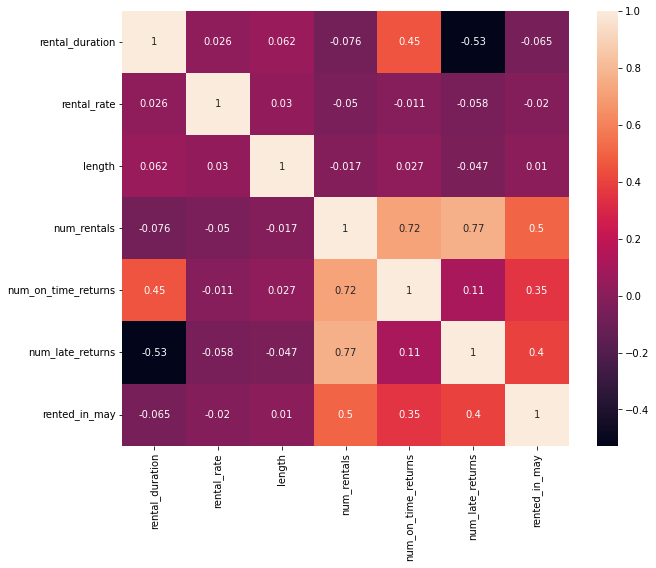

In [72]:

corr_matrix=data_merge.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [73]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data_merge['rented_in_may']
X = data_merge.drop('rented_in_may', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [75]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,rental_rate,length,num_rentals,num_on_time_returns,num_late_returns
0,0.50,1.0,0.769784,0.235294,0.192308,0.111111
1,0.75,0.0,0.151079,0.705882,0.615385,0.296296
2,0.00,0.5,0.258993,0.588235,0.115385,0.629630
3,0.50,1.0,0.223022,0.852941,0.538462,0.555556
4,0.25,0.0,0.733813,0.470588,0.269231,0.333333


In [76]:
X_train_norm.isna().sum()


rental_duration        0
rental_rate            0
length                 0
num_rentals            0
num_on_time_returns    0
num_late_returns       0
dtype: int64

In [77]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_norm, y_train)

In [78]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [79]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_norm)
classification.score(X_test_norm, y_test)

0.735

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 31,  31],
       [ 22, 116]], dtype=int64)

In [81]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='uniform')
clf.fit(X_train_norm, y_train)
predictions_clf = clf.predict(X_test_norm)
clf.score(X_test_norm, y_test)

In [ ]:
confusion_matrix(predictions_clf,y_test)

In [ ]:
#Using SMOTE to see if we can influence the outcome
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=10)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [ ]:
class_smote = LogisticRegression(random_state=10,solver='lbfgs').fit(X_train_norm, y_train)
class_smote.score(X_test_norm, y_test)

In [ ]:
pred_smote = class_smote.predict(X_test_nrml)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))